In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import StringIO

In [161]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv'
s=requests.get(url).content
titanic = pd.read_csv(StringIO(s.decode('utf-8')))

In [162]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
survived = titanic.groupby(['Pclass' , 'Sex'] , as_index = True).agg({'Survived':[np.size , np.mean] , 'Age':[np.mean]})
survived['Survived' , 'Number'] = survived['Survived' , 'mean'] * survived['Survived' , 'size']
survived['Survived' , 'Ratio'] = survived['Survived' , 'Number'] / survived['Survived' , 'size']
survived.head()

Survived                  Age Survived          
                  size      mean       mean   Number     Ratio
Pclass Sex                                                    
1      female       94  0.968085  34.611765     91.0  0.968085
       male        122  0.368852  41.281386     45.0  0.368852
2      female       76  0.921053  28.722973     70.0  0.921053
       male        108  0.157407  30.740707     17.0  0.157407
3      female      144  0.500000  21.750000     72.0  0.500000

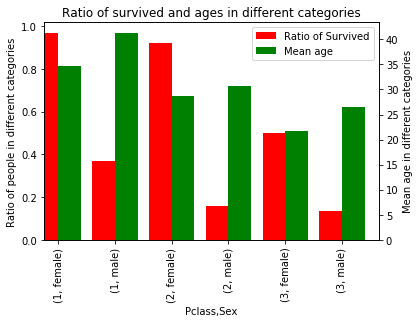

In [164]:
fig = plt.figure()
ax1 = fig.add_subplot(1 , 1 , 1)
ax2 = ax1.twinx()
survived['Survived' , 'Ratio'].plot(kind = 'bar' , ax = ax1 , color = 'red' , width = 0.4 , position = 1 , label = 'Ratio of Survived')
survived['Age' , 'mean'].plot(kind = 'bar' , color = 'green' ,ax = ax2, width = 0.4 , position = 0 , label = 'Mean age')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=1)
ax1.set_title('Ratio of survived and ages in different categories')
ax1.set_ylabel('Ratio of people in different categories')
ax2.set_ylabel('Mean age in different categories')

/home/rahul/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/rahul/.local/lib/python3.6/site-packages/matplotlib/cbook.py:2066: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/rahul/.local/lib/python3.6/site-packages/matplotlib/cbook.py:2073: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/home/rahul/.local/lib/python3.6/site-packages/matplotlib/cbook.py:2081: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/home/rahul/.local/lib/python3.6/site-packages/matplotlib/cbook.py:2082: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


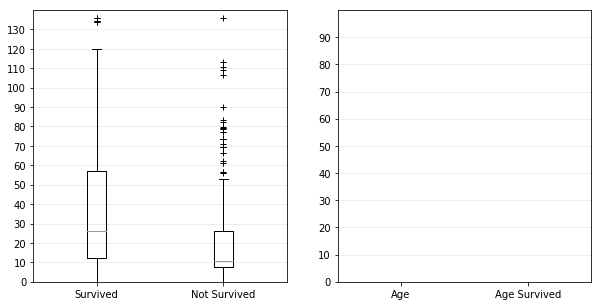

In [172]:
fare1 = titanic[titanic.Survived == 1][['Fare']].values
fare2 = titanic[titanic.Survived == 0][['Fare']].values
data = [fare1 , fare2]
age = titanic[['Age']].values
ageSur = titanic[titanic.Survived == 1][['Age']].values
ageNon = titanic[titanic.Survived == 0][['Age']].values
data2 = [age , ageSur , ageNon]
fig2 , ax = plt.subplots(1 , 2 , figsize = (10 , 5))
ax[0].boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
ax[0].set_ylim(0 , 140)
ax[0].yaxis.set_ticks(np.arange(0,140,10))
plt.setp(ax[0], xticklabels= ['Survived' , 'Not Survived'])
ax[0].yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.5)
ax[0].set_xlim(0.5, 2+ 0.5)
ax[0].set_axisbelow(True)
ax[1].boxplot(data2, notch=0, sym='+', vert=1, whis=1.5)
ax[1].set_ylim(0 , 100)
ax[1].yaxis.set_ticks(np.arange(0,100,10))
plt.setp(ax[1] , xticklabels = ['Age' , 'Age Survived' , 'Age Not Survived'])
ax[1].yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.5)
ax[1].set_xlim(0.5 , 3 + 0.5)
ax[1].set_axisbelow(True)




In [173]:
titanic['Age'].dtype


dtype('float64')

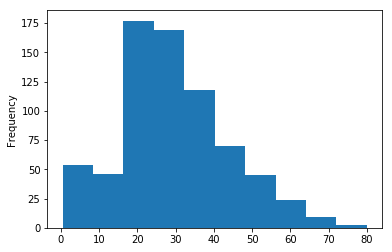

In [167]:
titanic['Age'].plot(kind = 'hist', bins = 10)

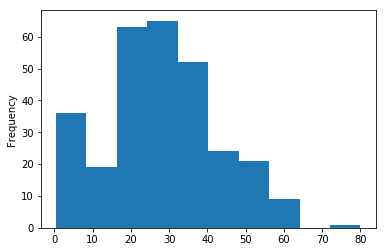

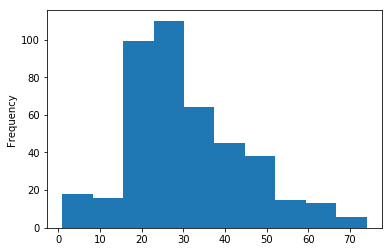

In [171]:
titanic[titanic.Survived == 1]['Age'].plot(kind = 'hist' , bins = 10)
plt.figure()
titanic[(titanic.Survived == 0)]['Age'].plot(kind = 'hist' , bins = 10)